In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, GRU
from sklearn.preprocessing import StandardScaler
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [10]:
df = pd.read_csv('EVChargingStationUsage.csv', low_memory=False)
df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3.0,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Customer,4.0,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5.0,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Customer,6.0,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7.0,94043.0,3765,NaN,NaN,NaN


In [26]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df = df.drop('MAC Address', axis=1)
# df = df.drop('Model Number', axis=1)
# df = df.drop('System S/N', axis=1)
# df = df.drop('County', axis=1)
# df = df.drop('User ID', axis=1)
# df = df.drop('Driver Postal Code', axis=1)
# df = df.drop('Plug In Event Id', axis=1)
# df = df.drop('Ended By', axis=1)
# df = df.drop('Fee', axis=1)
# df = df.drop('Currency', axis=1)
# df = df.drop('Country', axis=1)
# df = df.drop('State/Province', axis=1)
# df = df.drop('Postal Code', axis=1)
# df = df.drop('GHG Savings (kg)', axis=1)
# df = df.drop('Gasoline Savings (gallons)', axis=1)
# df = df.drop('Port Type', axis=1)
# df = df.drop('Port Number', axis=1)
# df = df.drop('Plug Type', axis=1)
# df = df.drop('EVSE ID', axis=1)
# df = df.drop('Start Time Zone', axis=1)
# df = df.drop('End Time Zone', axis=1)
# df = df.drop('Total Duration (hh:mm:ss)', axis=1)
# df = df.drop('Charging Time (hh:mm:ss)', axis=1)
# df = df.drop('End Date', axis=1)
# df = df.drop('Transaction Date (Pacific Time)', axis=1)
# df = df.drop('Org Name', axis=1)
# df = df.drop('Address 1', axis=1)
# df = df.drop('City', axis=1)
# df = df.drop('Latitude', axis=1)
# df = df.drop('Longitude', axis=1)
# # df = df.drop('', axis=1)

In [ ]:
# X = df[['Station Name', 'Start Date']]
# y = df[['Energy (kWh)']]

In [ ]:
# scaler_X = StandardScaler()
# X_scaled = scaler_X.fit_transform(X)

# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [12]:
from datetime import datetime

# how many percent drivers stay parked after charge

df1 = df.reset_index(drop=True).copy()

df1["Total Duration (hh:mm:ss)"] = pd.to_timedelta(df1["Total Duration (hh:mm:ss)"]).dt.total_seconds()
df1["Charging Time (hh:mm:ss)"] = pd.to_timedelta(df1["Charging Time (hh:mm:ss)"]).dt.total_seconds()
df1["ExtendParkAfterChargeMin"] = (df1["Total Duration (hh:mm:ss)"] - df1["Charging Time (hh:mm:ss)"]) / 60

# Filter df1 by df1["ExtendParkAfterChargeHrs"] > 0
df1 = df1[(df1["ExtendParkAfterChargeMin"] >= 0)]
df1.head(5)

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,ExtendParkAfterChargeMin
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,11012.0,6843.0,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,3.0,95124.0,3284,NaN,NaN,NaN,69.483333
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,126.0,114.0,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Customer,4.0,94301.0,4169,NaN,NaN,NaN,0.200000
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,15452.0,15448.0,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,5.0,94301.0,4169,NaN,NaN,NaN,0.066667
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,7404.0,7378.0,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Customer,6.0,94302.0,2545,NaN,NaN,NaN,0.433333
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,4284.0,2634.0,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301.0,United States,37.444572,-122.160309,USD,0.0,Plug Out at Vehicle,7.0,94043.0,3765,NaN,NaN,NaN,27.500000


In [13]:
IQR = df1["ExtendParkAfterChargeMin"].quantile(0.75) - df1[
    "ExtendParkAfterChargeMin"
].quantile(0.25)
# Identify the outlier rows.
outlier_rows = (
    df1["ExtendParkAfterChargeMin"]
    < (df1["ExtendParkAfterChargeMin"].quantile(0.25) - 1.5 * IQR)
) | (
    df1["ExtendParkAfterChargeMin"]
    > (df1["ExtendParkAfterChargeMin"].quantile(0.75) + 1.5 * IQR)
)

# Remove the outlier rows from the column.
df1["ExtendParkAfterChargeMin"] = df1["ExtendParkAfterChargeMin"][~outlier_rows]

df1 = df1.dropna()

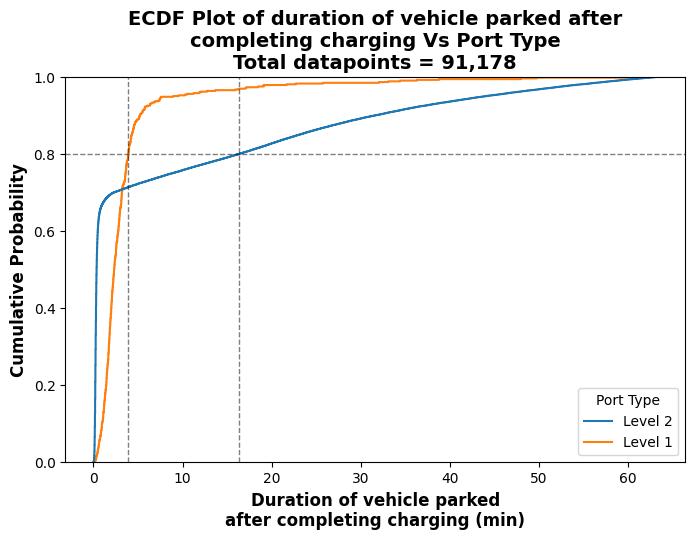

ECDF interpretation
80% of customers who used Level 1 completed charging and moved vehicle within 3.9 minutes
80% of customers who used Level 2 completed charging and moved vehicle within 16.3 minutes


In [14]:
plt.subplots(figsize=(8, 5))
g = sns.ecdfplot(data=df1, x="ExtendParkAfterChargeMin", hue="Port Type")
# Get the lines in the ecdfplot
lines = g.get_lines()

x_values = []
y_values = []

for line in lines:
    x_values.append(line.get_data()[0][np.where(line.get_data()[1] >= 0.8)[0][0]])
    y_values.append(0.8)

# Add a vertical dashed line at each x value
for x_value in x_values:
    plt.axvline(x_value, linestyle="--", color="black", linewidth=1, alpha=0.5)

# Add a horizontal dashed line at y = 0.8
plt.axhline(0.8, linestyle="--", color="black", linewidth=1, alpha=0.5)

# Set the title and labels of the plot
plt.title(
    f"ECDF Plot of duration of vehicle parked after\ncompleting charging Vs Port Type\nTotal datapoints = {len(df1['ExtendParkAfterChargeMin']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel(
    "Duration of vehicle parked\nafter completing charging (min)",
    fontsize=12,
    fontweight="bold",
)
plt.ylabel("Cumulative Probability", fontsize=12, fontweight="bold")
plt.show()

print("ECDF interpretation")
print(f"80% of customers who used Level 1 completed charging and moved vehicle within {x_values[0]:.1f} minutes")
print(f"80% of customers who used Level 2 completed charging and moved vehicle within {x_values[1]:.1f} minutes")

[]

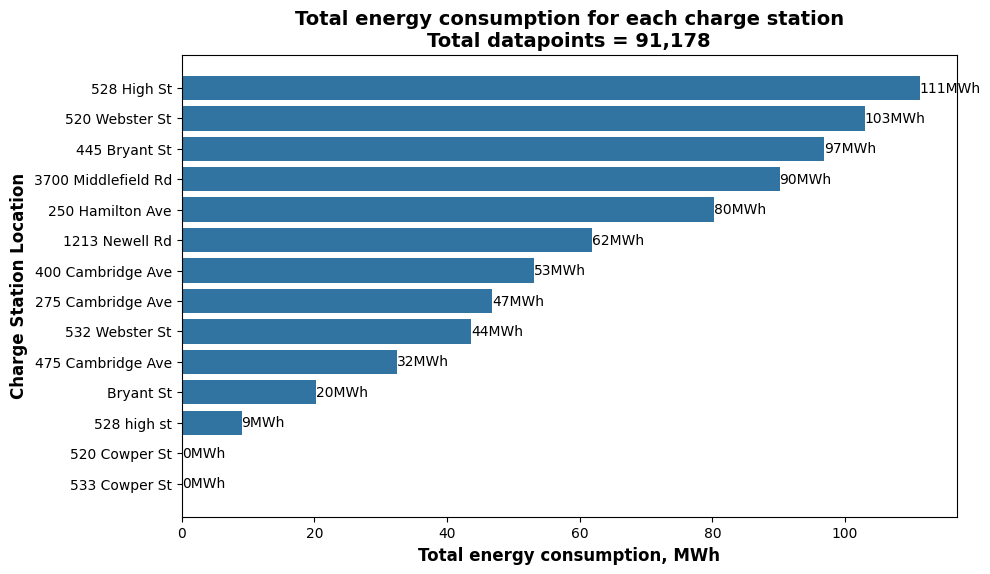

In [17]:
plt.subplots(figsize=(10, 6))
df2 = df1.copy()
df_mwh = (
    df2.groupby("Address 1")["Energy (kWh)"]
    .sum()
    .div(1000)
    .reset_index()
    .sort_values(by="Energy (kWh)", ascending=False)
    .reset_index(drop=True)
)
ax = sns.barplot(data=df_mwh, x="Energy (kWh)", y="Address 1")
ax.bar_label(ax.containers[0], label_type="edge", fmt="{:,.0f}MWh")
plt.title(
    f"Total energy consumption for each charge station\nTotal datapoints = {len(df2['Postal Code']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Total energy consumption, MWh", fontsize=12, fontweight="bold")
plt.ylabel(
    "Charge Station Location",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

In [19]:
df2["StartYear"] = pd.to_datetime(df2["Start Date"]).dt.year
df2["StartMonth"] = pd.to_datetime(df2["Start Date"]).dt.month
df2["StartDayofWeek"] = pd.to_datetime(df2["Start Date"]).dt.day_name()
df2["StartIsWeekend"] = df2["StartDayofWeek"].isin(["Saturday", "Sunday"])
df2["StartIsWeekend"] = df2["StartIsWeekend"].replace(
    {True: "Weekend", False: "Weekday"}
)

[]

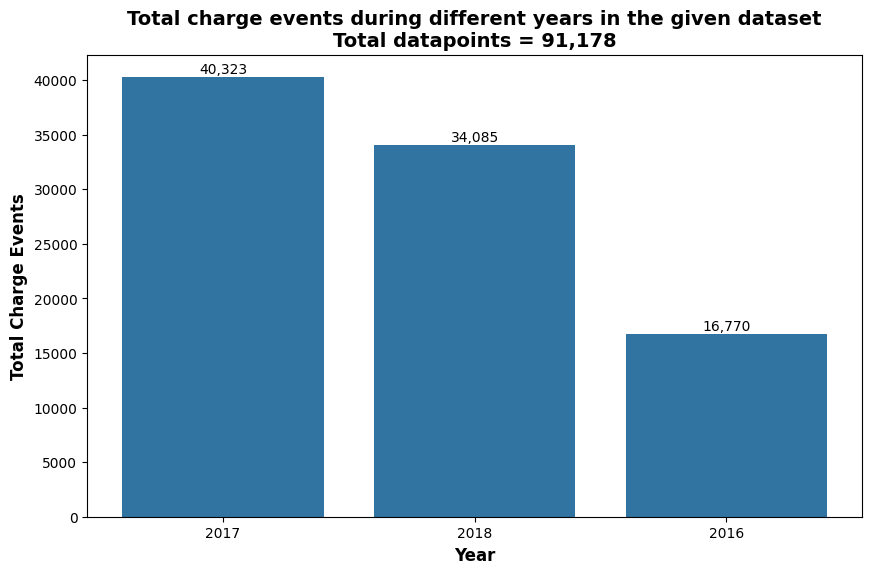

In [22]:
plt.subplots(figsize=(10, 6))
df_a = (
    df2.groupby("StartYear")["Driver Postal Code"]
    .size()
    .reset_index()
    .sort_values(by="Driver Postal Code", ascending=False)
    .reset_index(drop=True)
)

ax = sns.barplot(
    data=df_a, y="Driver Postal Code", x="StartYear", order=df_a["StartYear"]
)
ax.bar_label(ax.containers[0], label_type="edge", fmt="{:,.0f}")
plt.title(
    f"Total charge events during different years in the given dataset\nTotal datapoints = {len(df2['Postal Code']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel(
    "Total Charge Events",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

[]

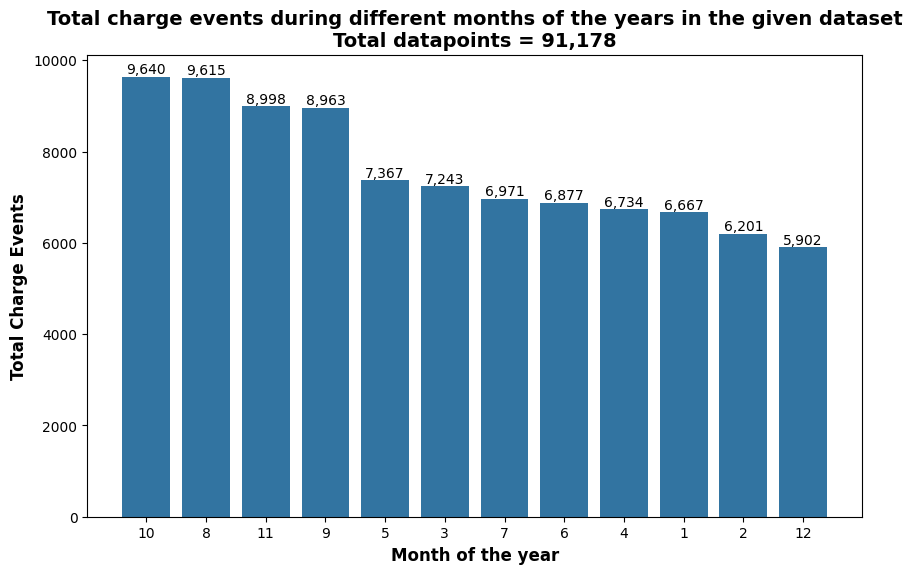

In [23]:
plt.subplots(figsize=(10, 6))
df_a = (
    df2.groupby("StartMonth")["Driver Postal Code"]
    .size()
    .reset_index()
    .sort_values(by="Driver Postal Code", ascending=False)
    .reset_index(drop=True)
)

ax = sns.barplot(
    data=df_a, y="Driver Postal Code", x="StartMonth", order=df_a["StartMonth"]
)
ax.bar_label(ax.containers[0], label_type="edge", fmt="{:,.0f}")
plt.title(
    f"Total charge events during different months of the years in the given dataset\nTotal datapoints = {len(df2['Postal Code']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Month of the year", fontsize=12, fontweight="bold")
plt.ylabel(
    "Total Charge Events",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

[]

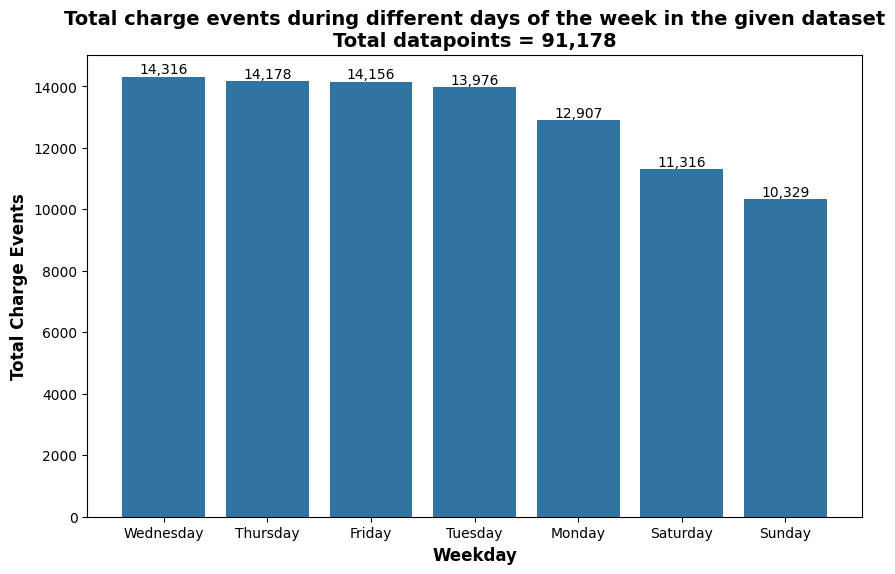

In [24]:
plt.subplots(figsize=(10, 6))
df_a = (
    df2.groupby("StartDayofWeek")["Driver Postal Code"]
    .size()
    .reset_index()
    .sort_values(by="Driver Postal Code", ascending=False)
    .reset_index(drop=True)
)

ax = sns.barplot(
    data=df_a, y="Driver Postal Code", x="StartDayofWeek", order=df_a["StartDayofWeek"]
)
ax.bar_label(ax.containers[0], label_type="edge", fmt="{:,.0f}")
plt.title(
    f"Total charge events during different days of the week in the given dataset\nTotal datapoints = {len(df2['Postal Code']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Weekday", fontsize=12, fontweight="bold")
plt.ylabel(
    "Total Charge Events",
    fontsize=12,
    fontweight="bold",
)
plt.plot()

[]

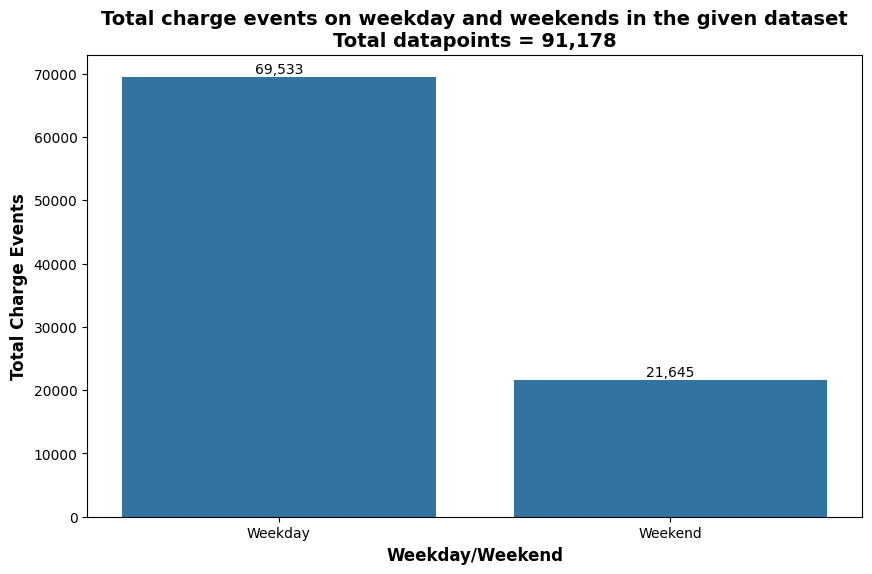

In [25]:
plt.subplots(figsize=(10, 6))
df_a = (
    df2.groupby("StartIsWeekend")["Driver Postal Code"]
    .size()
    .reset_index()
    .sort_values(by="Driver Postal Code", ascending=False)
    .reset_index(drop=True)
)

ax = sns.barplot(
    data=df_a, y="Driver Postal Code", x="StartIsWeekend", order=df_a["StartIsWeekend"]
)
ax.bar_label(ax.containers[0], label_type="edge", fmt="{:,.0f}")
plt.title(
    f"Total charge events on weekday and weekends in the given dataset\nTotal datapoints = {len(df2['Postal Code']):,}",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Weekday/Weekend", fontsize=12, fontweight="bold")
plt.ylabel(
    "Total Charge Events",
    fontsize=12,
    fontweight="bold",
)
plt.plot()